In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
df = pd.read_excel('/content/drive/MyDrive/경영혁신공모전/사용데이터/combined_df_merged.xlsx')
df

,Date,AppName,Country,CONTINENT,AD_LAN,Store_Visit,Store_Acquisition,DAU,MAU,Bound,...,Matched requests,Clicks,Match rate,Show rate,CTR,Bid requests,Bids in auction,Winning bids,Bids in auction (%),Win rate
0,2022-09-03,꼬마경찰관,South Korea,아시아,한국어,57.0,17.0,NaN,NaN,4.0,...,252.0,6.0,1.000000,0.880952,0.027027,252.0,252.0,252.0,1.000000,1
1,2022-09-04,꼬마경찰관,South Korea,아시아,한국어,42.0,19.0,NaN,NaN,2.0,...,619.0,14.0,1.000000,0.911147,0.024823,619.0,619.0,619.0,1.000000,1
2,2022-09-05,꼬마경찰관,South Korea,아시아,한국어,89.0,27.0,NaN,NaN,7.0,...,519.0,11.0,1.000000,0.890173,0.02381,519.0,519.0,519.0,1.000000,1
3,2022-09-06,꼬마경찰관,South Korea,아시아,한국어,79.0,19.0,NaN,NaN,9.0,...,671.0,20.0,1.000000,0.910581,0.032733,671.0,671.0,671.0,1.000000,1
4,2022-09-07,꼬마경찰관,South Korea,아시아,한국어,106.0,15.0,NaN,NaN,3.0,...,427.0,10.0,1.000000,0.908665,0.025773,427.0,427.0,427.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292526,2024-08-02,퍼즐놀이,Egypt,중동,아랍어,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292527,2024-08-03,퍼즐놀이,Egypt,중동,아랍어,1.0,0.0,NaN,NaN,NaN,...,8.0,0.0,0.888889,0.750000,0,9.0,8.0,8.0,0.888889,1
292528,2024-08-04,퍼즐놀이,Egypt,중동,아랍어,2.0,1.0,NaN,NaN,NaN,...,10.0,1.0,0.526316,0.900000,0.111111,19.0,10.0,10.0,0.526316,1
292529,2024-08-05,퍼즐놀이,Egypt,중동,아랍어,2.0,0.0,NaN,NaN,NaN,...,13.0,2.0,0.541667,1.000000,0.153846,24.0,13.0,13.0,0.541667,1


In [4]:
df['Country'].unique()

array(['South Korea', 'United States', 'New Zealand', 'Canada',
       'Australia', 'Netherlands', 'Germany', 'United Kingdom',
       'Singapore', 'Switzerland', 'Mexico', 'Brazil', 'Indonesia',
       'Malaysia', 'Japan', 'Taiwan', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Egypt', 'Austria', 'Hong Kong', 'Spain', 'Chile',
       'Uruguay', 'Argentina', 'Costa Rica', 'Colombia', 'Peru',
       'Ecuador', 'Country', nan], dtype=object)

In [5]:
df_korea = df[df['Country']=='South Korea']

In [6]:
df_korea['AppName'].unique()

array(['꼬마경찰관', '놀이공원', '코코비 동물구조대', '병원놀이', '코코비 색칠놀이', '슈퍼마켓',
       '코코비 아기돌보기', '여름휴가', '코코비 월드1', '코코비 월드2', '코코비 잠자기', '청소놀이',
       '퍼즐놀이'], dtype=object)

In [7]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc


In [8]:
print(mpl.get_cachedir())

/root/.cache/matplotlib


In [9]:
plt.rc('font', family='NanumGothic')

<ipython-input-11-a9f8fdec1e33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_korea['AppName'] = df_korea['AppName'].astype('category')


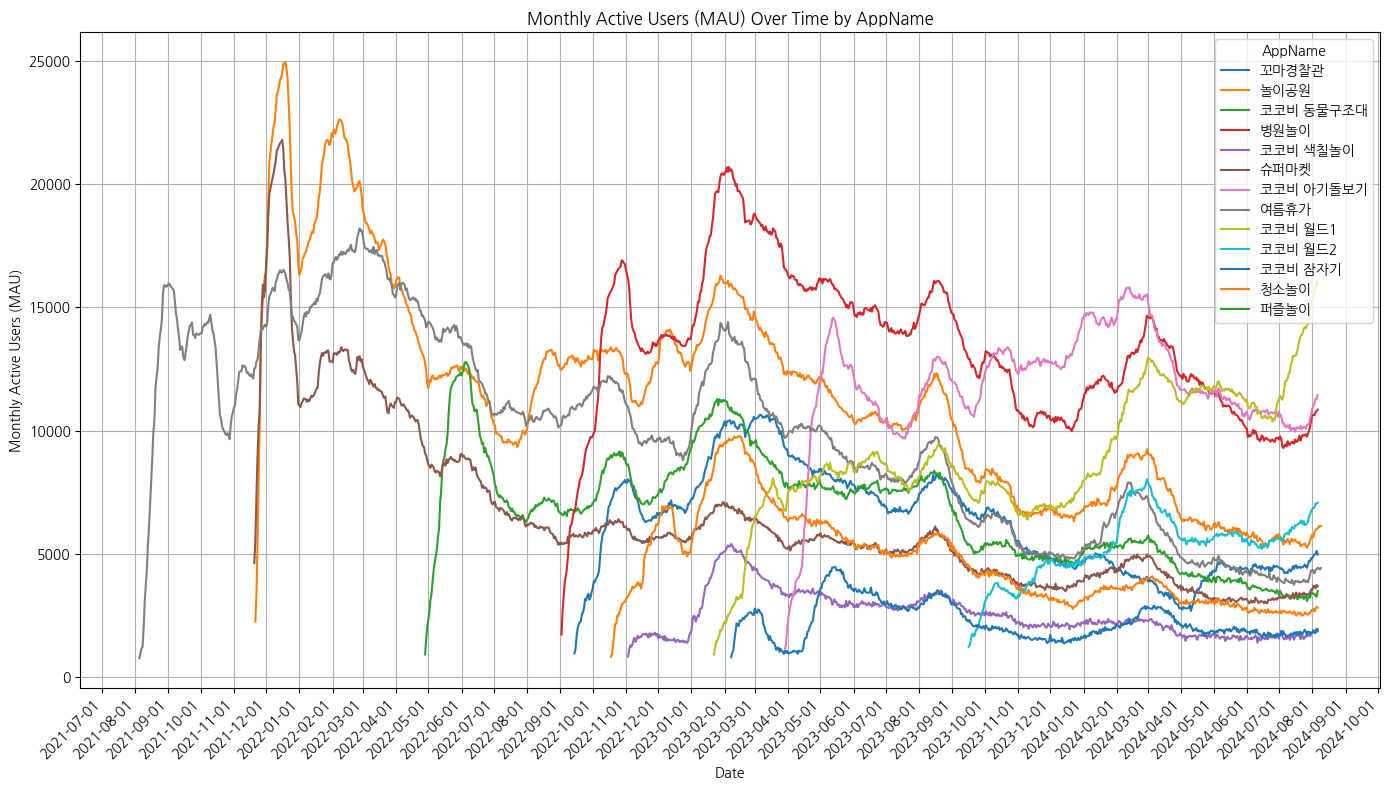

In [11]:
# File Path: colab_visualize_mau.py

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates

# Ensure 'AppName' is treated as a category
df_korea['AppName'] = df_korea['AppName'].astype('category')

# 3. Font Configuration for Korean text
# Use a font that supports Korean characters
plt.rcParams['font.family'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus sign is shown correctly

# 4. Plotting
plt.figure(figsize=(14, 8))

# Plot MAU over time for each AppName
for app in df_korea['AppName'].unique():
    app_data = df_korea[df_korea['AppName'] == app]
    plt.plot(app_data['Date'], app_data['MAU'], label=app)

# 5. Customize Plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Monthly Active Users (MAU)')
plt.title('Monthly Active Users (MAU) Over Time by AppName')
plt.legend(title='AppName')
plt.grid(True)

# 6. Show the plot
plt.tight_layout()
plt.show()
